In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(299, 9)

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
numerical_columns=df.select_dtypes(include='number')
correlation_matrix=numerical_columns.corr()

In [12]:
correlation_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


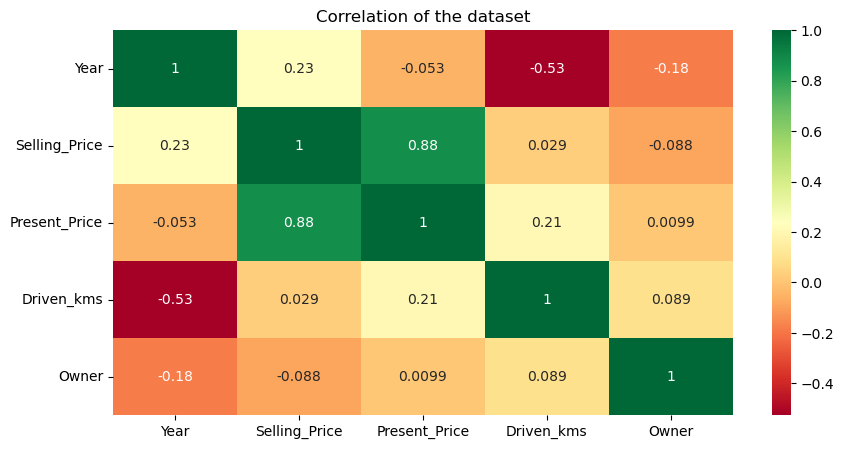

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation of the dataset')
plt.show()

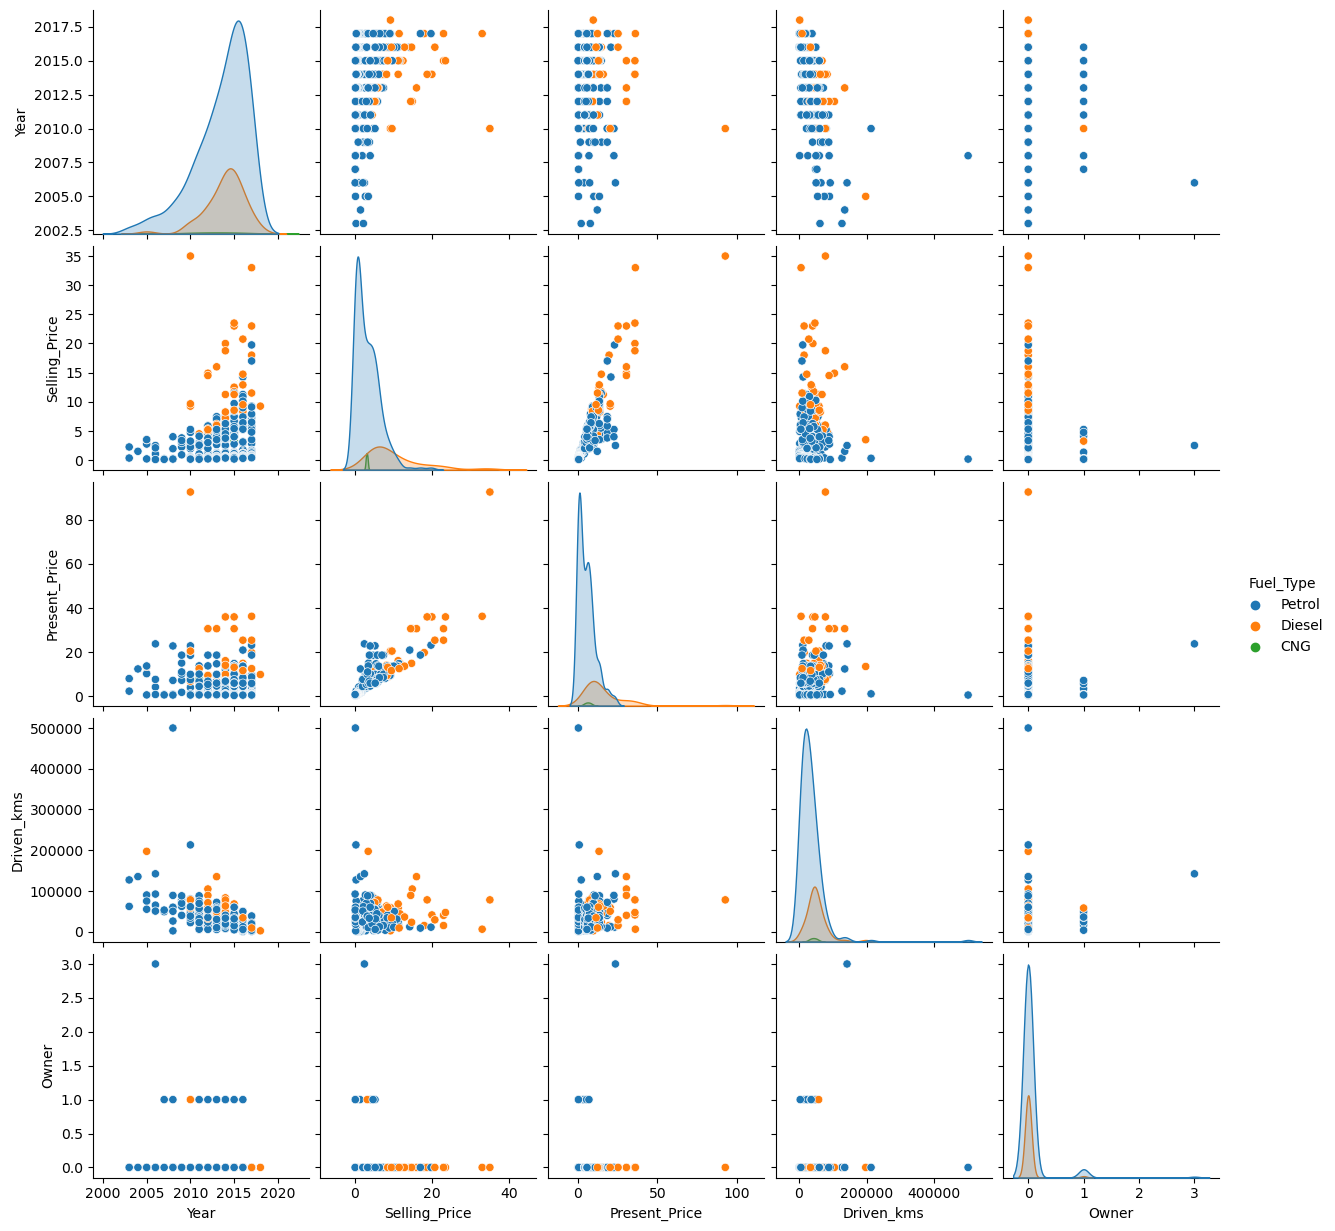

In [14]:
sns.pairplot(df, hue='Fuel_Type')

<Figure size 1000x600 with 0 Axes>

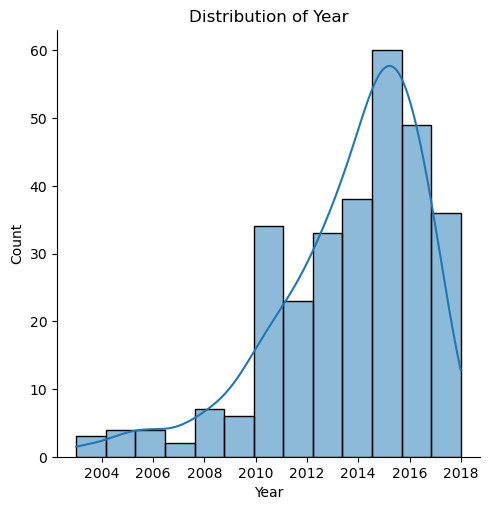

<Figure size 1000x600 with 0 Axes>

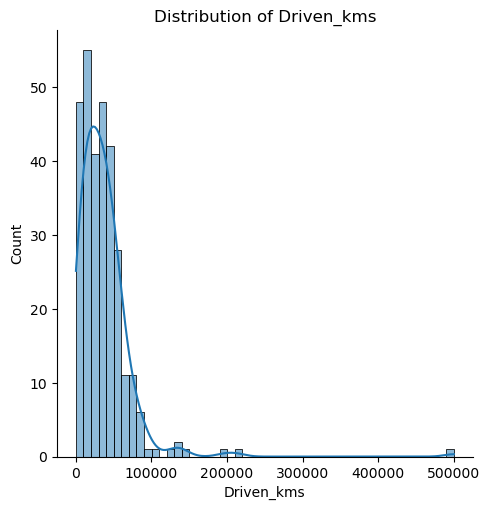

<Figure size 1000x600 with 0 Axes>

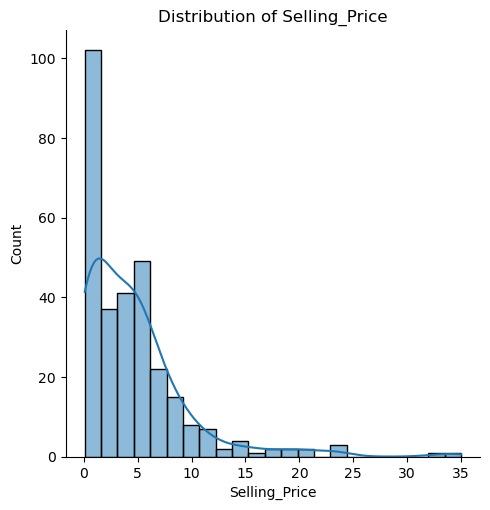

<Figure size 1000x600 with 0 Axes>

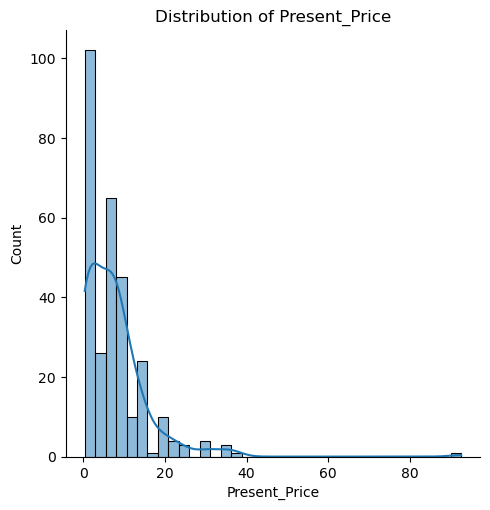

In [15]:
numerical_features=['Year','Driven_kms','Selling_Price','Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

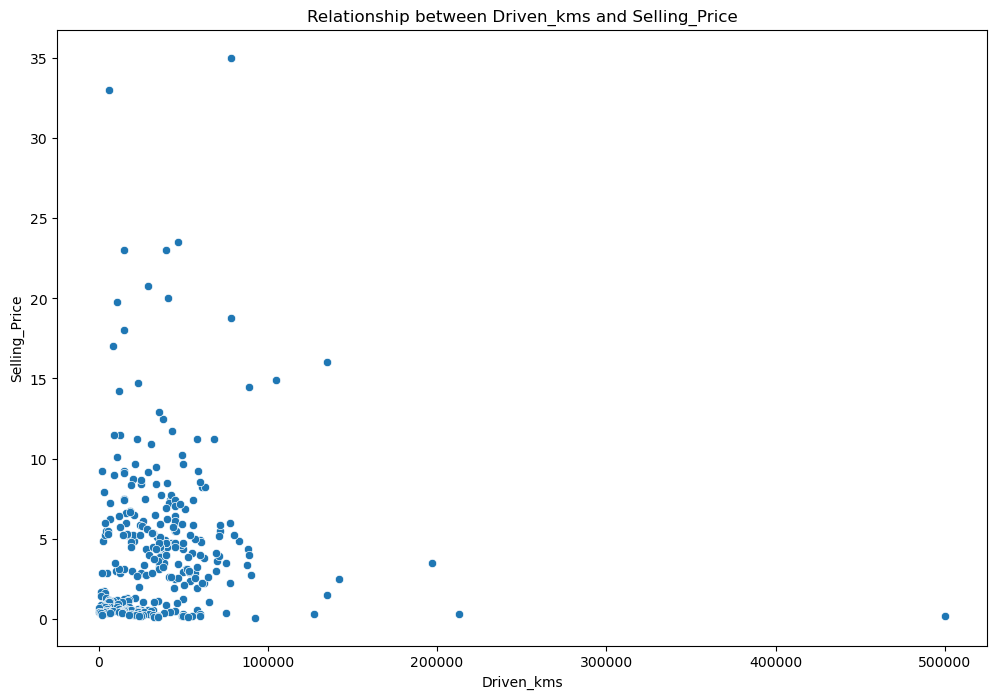

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

Text(0, 0.5, 'Selling_Price')

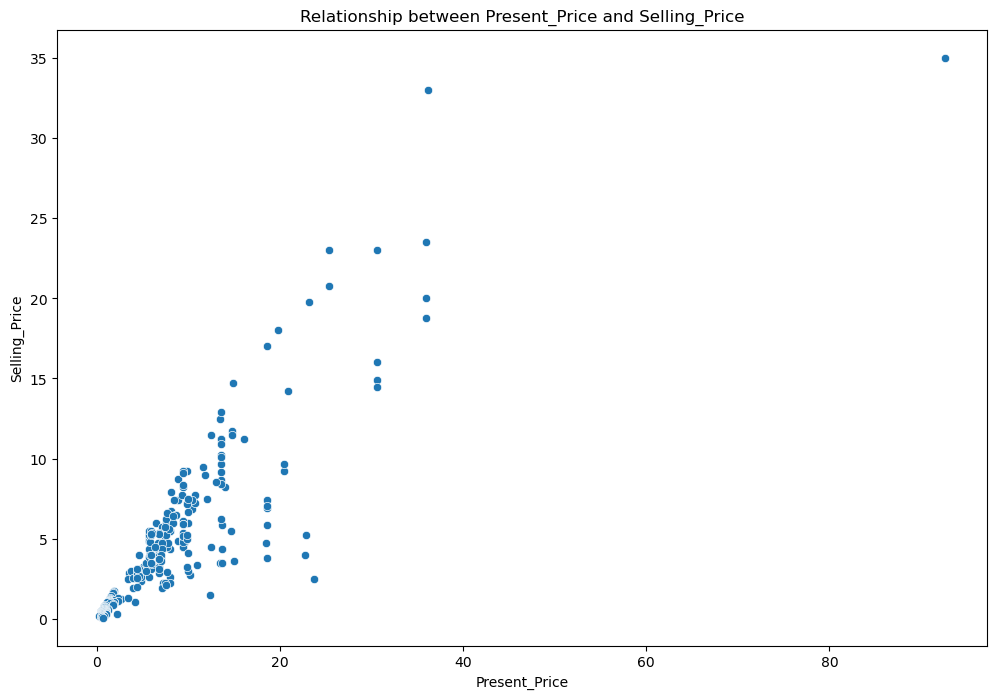

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Present_Price', y='Selling_Price',data=df)
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')


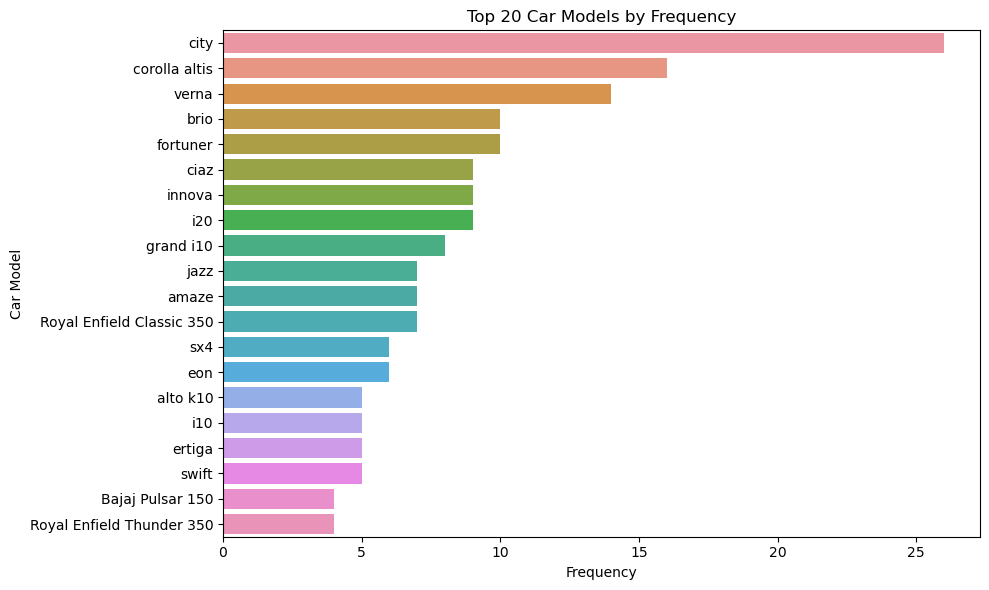

In [18]:
n=20
top_car_models=df['Car_Name'].value_counts().head(n)
plt.figure(figsize=(10,6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title('Top 20 Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

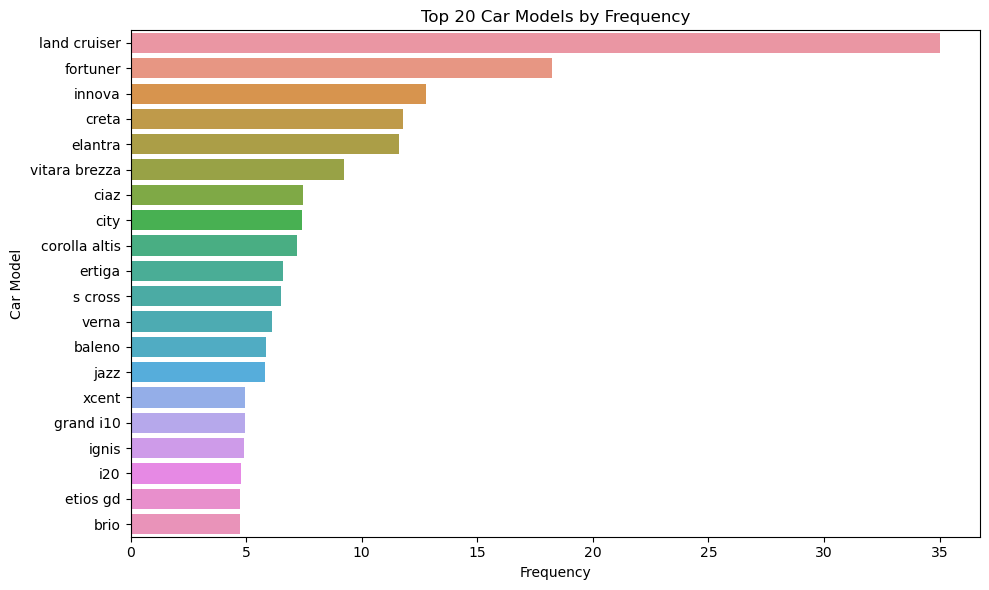

In [19]:
avg_prices_by_car=df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)
n=20
top_car_models=avg_prices_by_car.head(n)
plt.figure(figsize=(10,6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title('Top 20 Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [20]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [21]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

In [22]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [23]:
df.replace({'Selling_type':{'Dealer':0,'Individual':1}}, inplace=True)

In [24]:
df['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [25]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [27]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [28]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [29]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [30]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y,test_size=0.2)

In [31]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
Y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test, Y_pred)
print('Mean Squared Error:',mse)
print('R-squared:',r2)

Mean Squared Error: 5.806539274343
R-squared: 0.7238765051783775


In [33]:
new_car=[[2024,7.0,25000,0,0,1,0]]
predicted_price=model.predict(new_car)
print('Predicted Selling Price:',predicted_price[0])

Predicted Selling Price: 8.994549160177598
